In this part, we'll try to plot the time-course of 1 IC extracted from the EEG of 1 subject on 1 trial.

# First let's extract the time scale data and the time-course data from the .mat file:

In [152]:
import h5py
import numpy as np
import xarray as xr
from utilities import flatten_dict

In [153]:
path = "E:/timot/Documents/1 - Centrale Marseille/0.5 - Semestre S8/Stage/NIC_250819/FCK_LOCKED_IC_JYOTIKA_250819.mat"

mat_file = h5py.File(path, "r")
cells_refs = mat_file['FCK_LOCKED_IC_JYOTIKA']
n_IC, n_subj = cells_refs.shape

Here we define the functions that extract the data from the .mat file:

In [154]:
def _load_raw_timecourse_256Hz(IC, subj):
    cell = mat_file[cells_refs[IC, subj]]
    raw_timecourse_256Hz = cell['raw_timecourse_256Hz'][:]
    raw_timecourse_256Hz = np.transpose(raw_timecourse_256Hz)
    return raw_timecourse_256Hz

In [155]:
def _load_time_256Hz(IC,subj):
    cell = mat_file[cells_refs[IC, subj]]
    time_256Hz = cell['time_256Hz'][:]
    time_256Hz = np.transpose(time_256Hz)[0]
    return time_256Hz

In [156]:
def _load_freq(IC,subj):
    cell = mat_file[cells_refs[IC, subj]]
    freq = cell['freq'][:]
    freq = np.transpose(freq)[0]
    return freq

Here we extract `time_axis`, `raw_timecourse_subj0_IC0`, and `freq_axis`:

In [191]:
time_axis = _load_time_256Hz(0, 0)

In [192]:
time_axis

array([-4.        , -3.99609375, -3.9921875 , ...,  2.9921875 ,
        2.99609375,  3.        ])

In [193]:
len(time_axis)

1793

In [194]:
raw_timecourse_subj0_IC0 = _load_raw_timecourse_256Hz(0, 0)

In [195]:
freq_axis = _load_freq(0, 0)

In [196]:
freq_axis

array([ 2.        ,  2.57142857,  3.        ,  3.57142857,  4.        ,
        4.57142857,  5.        ,  5.57142857,  6.        ,  6.57142857,
        7.        ,  7.57142857,  8.        ,  8.57142857,  9.        ,
        9.57142857, 10.        , 10.57142857, 11.        , 11.57142857,
       12.        , 12.57142857, 13.        , 13.57142857, 14.        ,
       14.57142857, 15.        , 15.57142857, 16.        , 16.57142857,
       17.        , 17.57142857, 18.        , 18.57142857, 19.        ,
       19.57142857, 20.        , 20.57142857, 21.        , 21.57142857,
       22.        , 22.57142857, 23.        , 23.57142857, 24.        ,
       24.57142857, 25.        , 25.57142857, 26.        , 26.57142857,
       27.        , 27.57142857, 28.        , 28.57142857, 29.        ,
       29.57142857, 30.        , 30.57142857, 31.        , 31.57142857,
       32.        , 32.57142857, 33.        , 33.57142857, 34.        ,
       34.57142857, 35.        , 35.57142857, 36.        , 36.57

# Now that we have the expected data, we plot the time-course:

In [164]:
import mne
from sklearn.decomposition import PCA
from hmmlearn import hmm
import scipy.signal as signal
import matplotlib.pyplot as plt

Text(0, 0.5, 'Potentiel (eV)')

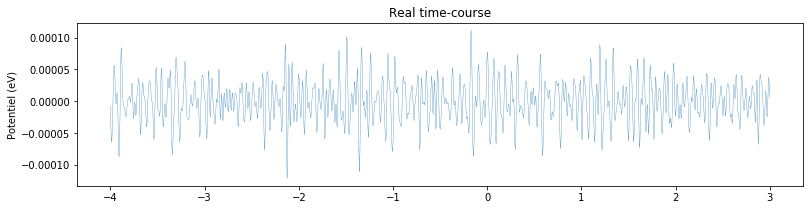

In [165]:
plt.figure(figsize=(13, 3))
plt.title('Real time-course')
plt.plot(time_axis, raw_timecourse_subj0_IC0[0,:], linewidth=.3)
plt.ylabel('Potentiel (eV)')

# Let's not wait any longer and try to plot a wavelet transform!

In [176]:
raw_timecourse_subj0_IC0

array([[-7.50833845e-06, -3.42053131e-05, -5.47569765e-05, ...,
         2.80652243e-05,  7.30566021e-06,  7.30566021e-06],
       [-4.29498901e-07, -1.30316883e-05, -1.61407841e-05, ...,
         2.07438746e-05, -6.48973945e-06, -6.48973945e-06],
       [-5.46866697e-06,  2.44311256e-05,  4.34509836e-05, ...,
         2.81629524e-05,  4.57681935e-06,  4.57681935e-06],
       ...,
       [-5.36286564e-06,  4.41837040e-06,  1.32102148e-05, ...,
         3.12688376e-06,  3.79513515e-06,  3.79513515e-06],
       [-5.67732396e-06, -5.85591065e-06, -2.65827333e-06, ...,
         5.22377052e-06,  3.93326594e-06,  3.93326594e-06],
       [ 1.99135207e-06,  2.52366828e-05,  3.63939076e-05, ...,
        -2.29817001e-05, -5.70984471e-06, -5.70984471e-06]])

In [177]:
shape = raw_timecourse_subj0_IC0.shape

In [178]:
shape

(763, 1793)

In [187]:
test3 = raw_timecourse_subj0_IC0[0,np.newaxis,np.newaxis,:]
test3.shape

(1, 1, 1793)

In [182]:
# Use MNE to extract TFR
info = mne.create_info(ch_names=['signal'], sfreq=256, ch_types=['eeg'])
raw = mne.EpochsArray(test3, info, verbose=False) 
n_cycles = freq/2

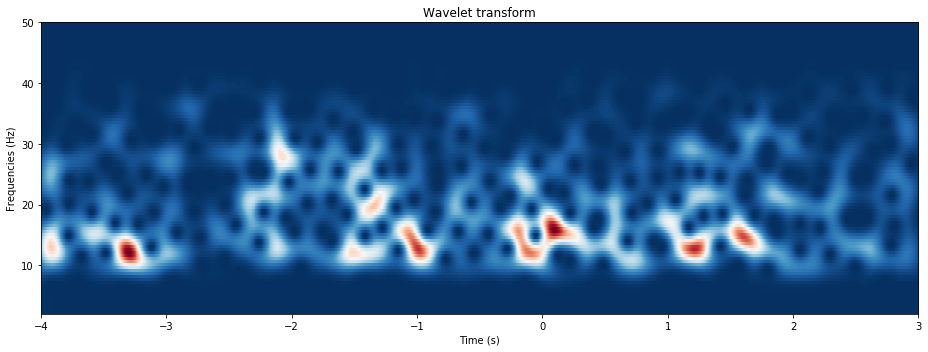

In [183]:
tfr = mne.time_frequency.tfr_morlet(raw, freqs=freq_axis, n_cycles=n_cycles, picks='eeg', return_itc=False)

plt.figure(figsize=(13, 5))
plt.title('Wavelet transform')
plt.imshow(tfr._data[0][:, :], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], cmap='RdBu_r')
plt.xlabel('Time (s)')
plt.ylabel('Frequencies (Hz)')
plt.tight_layout()
# plt.savefig('tde-hmm.png', dpi=600)

In [188]:
test3 = test2[100:105, np.newaxis, :]
test3.shape

(5, 1, 1793)

In [189]:
# Use MNE to extract TFR
raw = mne.EpochsArray(test3, info, verbose=False) 

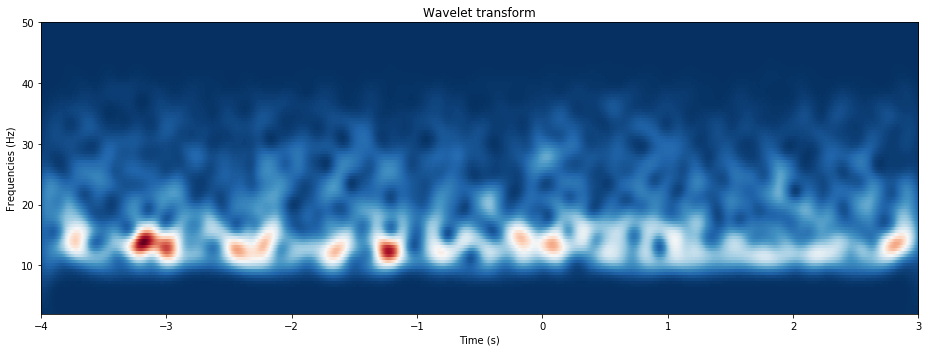

In [197]:
tfr = mne.time_frequency.tfr_morlet(raw, freqs=freq_axis, n_cycles=n_cycles, picks='eeg', return_itc=False)

plt.figure(figsize=(13, 5))
plt.title('Wavelet transform')
plt.imshow(tfr._data[0][:, :], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], cmap='RdBu_r')
plt.xlabel('Time (s)')
plt.ylabel('Frequencies (Hz)')
plt.tight_layout()
# plt.savefig('tde-hmm.png', dpi=600)

In [185]:
# Use MNE to extract TFR
raw = mne.EpochsArray(test3, info, verbose=False) 

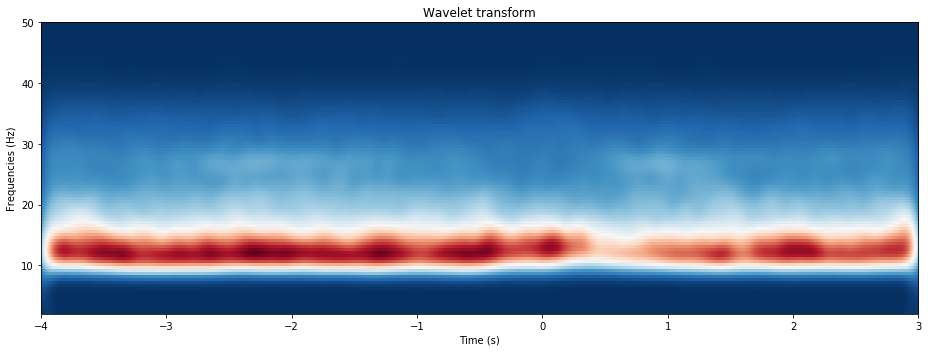

In [186]:
tfr = mne.time_frequency.tfr_morlet(raw, freqs=freq_axis, n_cycles=n_cycles, picks='eeg', return_itc=False)

plt.figure(figsize=(13, 5))
plt.title('Wavelet transform')
plt.imshow(tfr._data[0][:, :], aspect='auto', origin='lower', extent=[-4, 3, 2, 50], cmap='RdBu_r')
plt.xlabel('Time (s)')
plt.ylabel('Frequencies (Hz)')
plt.tight_layout()
# plt.savefig('tde-hmm.png', dpi=600)

In [175]:
tfr._data.shape

(1, 97, 1793)